In [1]:
import torch
from networkx.algorithms.bipartite.basic import color
from torch.distributions import multinomial
from d2l import torch as d2l

In [2]:
fair_probs = torch.ones([6]) / 6
fair_probs

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])

In [3]:
torch.ones([6])

tensor([1., 1., 1., 1., 1., 1.])

In [4]:
multinomial.Multinomial(1, fair_probs).sample()  # 1是實驗次數，即我擲一次骰子  .sample意思是執行采樣

tensor([1., 0., 0., 0., 0., 0.])

In [5]:
multinomial.Multinomial(10, fair_probs).sample()  # 一組實驗，擲10次骰子

tensor([1., 2., 1., 2., 1., 3.])

In [6]:
counts = multinomial.Multinomial(1000, fair_probs).sample()  # 一組實驗，擲1000次骰子
counts / 1000  # 計算估計值

tensor([0.1690, 0.1540, 0.1690, 0.1820, 0.1690, 0.1570])

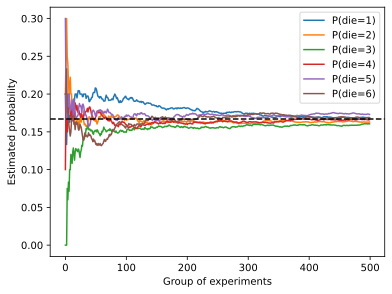

In [7]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))  # 500組實驗，分別擲10次骰子
cum_counts = counts.cumsum(dim=0)  # 按照行的方向（垂直）纍加每一組的次數
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)  # dim=1按照水平方向求和，每一行的結果都是10次並纍加
# keepdim=True則是保持維度(500,1)，不然就是變成一維的(1,500)
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=('P(die=' + str(i + 1) + ')'))
    # 只傳入一個數組的時候，Matplotlib會自動生成x軸數值，這裡用的是數組的索引
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')  #添加基準線 axhline=Axis Horizontal Line
d2l.plt.gca().set_xlabel('Group of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
# gca=Get Current Axes 獲取當前坐標軸，在Matplotlib中，所有文字，刻度，標題都屬於Axes對象
d2l.plt.legend()

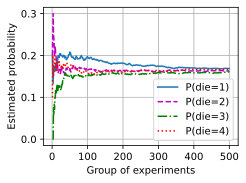

In [8]:
x_axis = torch.arange(1, 501)
d2l.plot(x_axis, [estimates[:, i] for i in range(6)],
         xlabel='Group of experiments',
         ylabel='Estimated probability',
         legend=[f'P(die={i + 1})' for i in range(6)])
# 缺少了大量可自定義細節，比如y=0.167的基準線

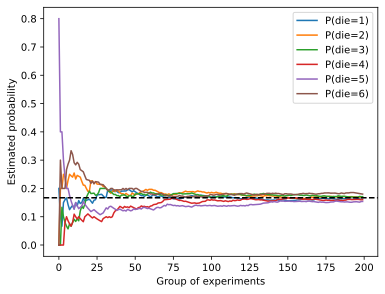

In [9]:
# 練習 1.
counts = multinomial.Multinomial(5, fair_probs).sample((200,))  # 500組實驗，分別擲10次骰子
cum_counts = counts.cumsum(dim=0)  # 按照行的方向（垂直）纍加每一組的次數
estimates = cum_counts / cum_counts.sum(dim=1, keepdim=True)  # dim=1按照水平方向求和，每一行的結果都是10次並纍加
# keepdim=True則是保持維度(500,1)，不然就是變成一維的(1,500)
d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=('P(die=' + str(i + 1) + ')'))
    # 只傳入一個數組的時候，Matplotlib會自動生成x軸數值，這裡用的是數組的索引
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')  #添加基準線 axhline=Axis Horizontal Line
d2l.plt.gca().set_xlabel('Group of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
# gca=Get Current Axes 獲取當前坐標軸，在Matplotlib中，所有文字，刻度，標題都屬於Axes對象
d2l.plt.legend()